# CIL 2023 - Eigenfaces

## Setup:
* Make sure you have installed numpy and matplotlib on your system (use pip3 install ...)
* Download the face images dataset (CroppedYaleExpr) from the moodle website. 

notes: the dataset is a non-comercial, publically available dataset from [Yale University](http://cvc.cs.yale.edu/cvc/projects/yalefaces/yalefaces.html). Face cropping has been performed using MTCNN by [Zhang et al., 2016](https://arxiv.org/abs/1604.02878)

In [ ]:
# you can also directly install packages from this Notebook:
!pip3 install numpy
!pip3 install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%matplotlib inline

import os, sys

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# First load data

image_dir = "drive/MyDrive/CroppedYaleExpr/"

files = sorted(os.listdir(image_dir))
n = len(files)
print("Loading " + str(n) + " images")

imgs = [np.load(image_dir + files[i]) for i in range(n)]

Loading 165 images


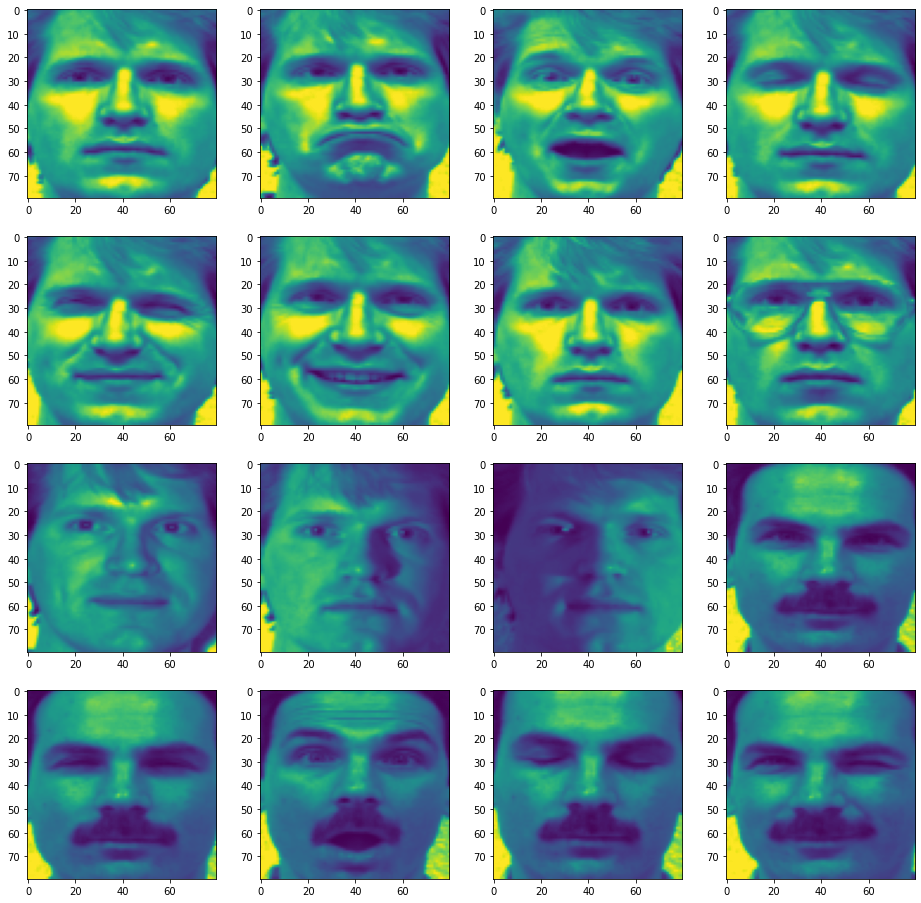

In [ ]:
# Display some images
pcols = 4
prows = 4

fig = plt.figure(figsize=(16,16))
for i in range(0, pcols*prows):
    fig.add_subplot(prows, pcols, i+1)
    plt.imshow(imgs[i])

In [ ]:
!pip install numpy

import numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
imgs[0].flatten().shape

(6400,)

In [ ]:
imgs[0].flatten().reshape(1, -1)

array([[0.38630995, 0.38612258, 0.34823528, ..., 1.        , 0.99981199,
        0.99434019]])

In [ ]:
# TODO - Compute input Matrix X: n x d
X = numpy.concatenate(tuple(img.flatten().reshape(-1, 1) for img in imgs), axis=1, out=None, dtype=None, casting="same_kind")
X.shape

(6400, 165)

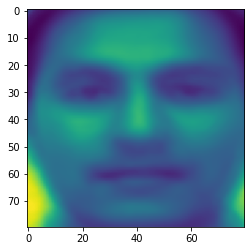

In [ ]:
# TODO - Subtract the mean image mX from input matrix X
mX = X - X.mean(axis=1).reshape((-1, 1))

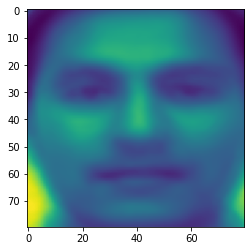

In [ ]:
# TODO - Visualize the mean image
plt.imshow(X.mean(axis=1).reshape((80, 80)))

In [ ]:
mX.shape

(6400, 165)

In [ ]:
# TODO - compute covariance matrix

covariance = mX @ mX.T

In [ ]:
# TODO - Compute SVD of the covariance matrix

U, s, V = numpy.linalg.svd(covariance)

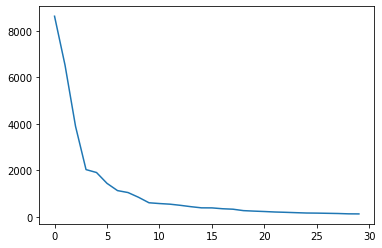

In [ ]:
plt.plot(s[0:30])

In [ ]:
# TODO - Choose a good number (k) of eigenvectors << D
# hint: You might want to plot the eigenvalues for your decision

k = 20

(6400, 6400)


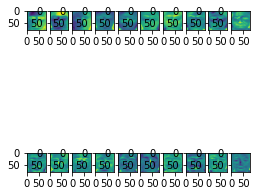

In [ ]:
# TODO - Extract and visualize the eigenfaces which are represented by the eigenvectors (columns of matrix U)
# Display some images
pcols = 10
prows = 4

fig = plt.figure(figsize=(prows,pcols))
print(U.shape)
for i, u in enumerate(U.T[:k]):
  # print(u.shape)
  image = u.reshape((80, 80))
  fig.add_subplot(prows, pcols, i+1)
  plt.imshow(image)


In [ ]:
# TODO - Build the reprojection Matrix (with the chosen rank constraints)

U_k = np.concatenate(tuple(u.reshape(-1, 1) for u in U.T[:k])+ tuple(np.zeros_like(U.T[0]).reshape(-1, 1)  for i in range(X.shape[1] - k)), axis=1)

In [ ]:
U_k.shape

(6400, 165)

In [ ]:
# TODO - Perform image compression with PCA keeping top K eigenvalues

Z = U_k.T @ mX

In [ ]:
# TODO - Perform image decompression (remember to add back the mean of the data)

X_bar = U_k @ Z + mX

In [ ]:
X_bar.shape

(6400, 165)

In [ ]:
len(imgs)

165

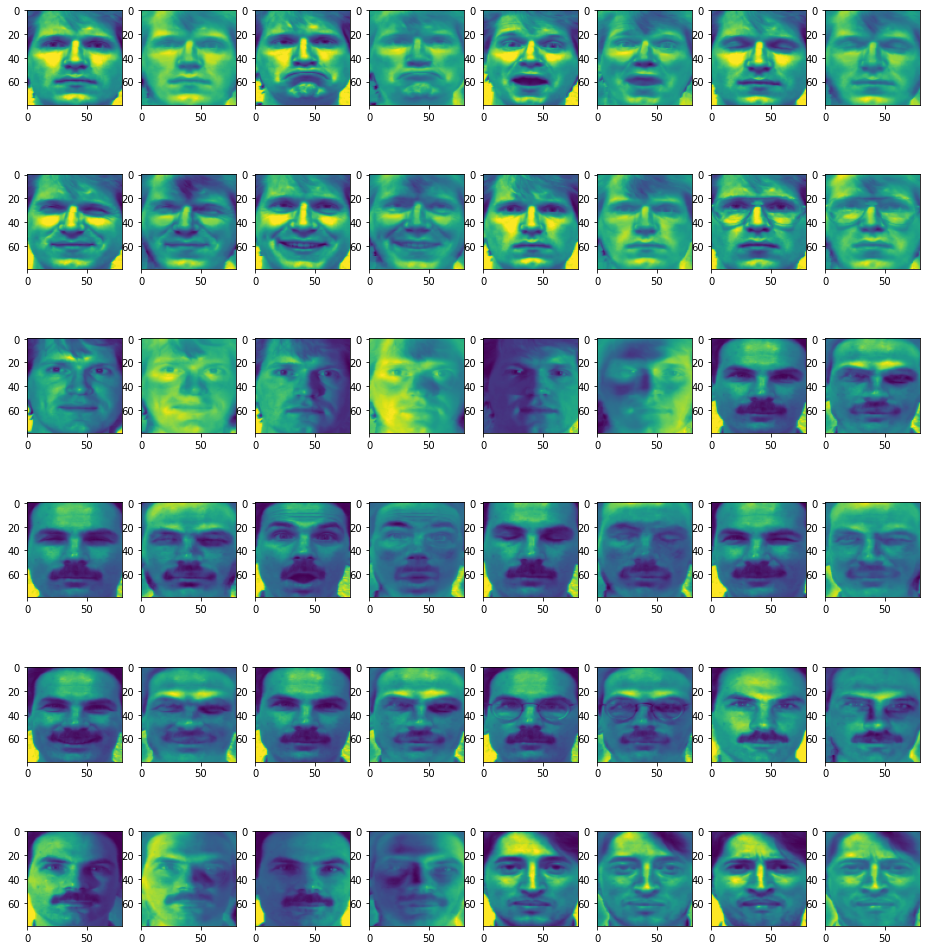

In [ ]:
# TODO - Plot the original and decompressed image, and play around with k. How does the quality change?

# Display some images
pcols = 8
prows = 24

fig = plt.figure(figsize=(16,3*prows))
for i in range(0, prows):
    org_img = imgs[i]
    fig.add_subplot(prows, pcols, (2*i)+1)
    plt.imshow(org_img)
    
    rec_img = X_bar.T[i].reshape((80, 80))
    fig.add_subplot(prows, pcols, (2*i)+2)
    plt.imshow(rec_img)

## (Bonus) Tucker Decomposition

This presents an additional extension of PCA for the interested reader and is not relevant for the exam.

#### You might have noticed that the dataset includes multiple images of the same subject while being captured in another condition. In total, we have 15 subjects and 11 conditions _{'normal': '00', 'sad': '01', 'surprised': '02', 'sleepy': '03', 'wink': '04', 'happy': '05', 'noglasses': '06', 'glasses': '07', 'centerlight': '08', 'leftlight': '09', 'rightlight': '10'}_. The filename encodes this information as ```{subjectID}_{conditionID}.npy```. 
 
#### Instead of performing PCA on the data-matrix $X \in \mathbb{R}^{D \times N}$ one could think about exploiting this information and perform PCA on a data-tensor $T \in \mathbb{R}^{D \times S \times C}$ instead, we refer to the dimensions of the tensor as _modes_. In this case, a three-mode extension of PCA is required and can be achieved with the [Tucker Decomposition](https://en.wikipedia.org/wiki/Tucker_decomposition). This can be used to trade the reconstruction quality in one mode for another.

#### In this exercise, we will use [Tensorly](http://tensorly.org/stable/index.html), an open-source Tensor-Library that implements the core Tensor operations and decompositions (pip3 install tensorly).

In [ ]:
import tensorly as tl
from tensorly.decomposition import tucker

#### Start by organising your data into the Tensor $T \in \mathbb{R}^{D \times S \times C}$. D: Image dimension, S: subjects, C: conditions

In [ ]:
# TODO - Fill the given tensor placeholder
T = np.zeros((height*width, 15, 11)) # flattened image size, #subjects, #conditions



In [ ]:
# TODO - center the Tensor 
mT = ...

#### The Tucker Decomposition gives us a core tensor $\mathcal{T}_c \in \mathbb{R}^{D \times S \times C}$ containing the 1-mode, 2-mode, and 3-mode singular values of T (the equivalent of the singular value matrix in SVD) and factors for each mode $U^{(1)} \in \mathbb{R}^{D \times D}$, $U^{(2)} \in \mathbb{R}^{S \times S}$, $U^{(3)} \in \mathbb{R}^{C \times C}$ (corresponding to the eigenvectors):

$T = \mathcal{T}_c \times_1 U^{(1)} \times_2 U^{(2)} \times_3 U^{(3)}$

#### , where $\times_m$ describes the m-mode product (you can think of this as a matrix multiplication along the specific axis of the tensor)

#### The Tensorly function lets us directly define rank constraints for the decomposition (tucker_rank $= [k_D, k_S, k_C]$). We can introduce a rank constraint per mode. Resulting into factors of the form $U^{(1)} \in \mathbb{R}^{k_D \times D}$, $U^{(2)} \in \mathbb{R}^{k_S \times S}$, $U^{(3)} \in \mathbb{R}^{k_C \times C}$

#### A 'fully' reconstructable decomposition can be achieved by choosing the maximum tucker rank (80*80, 15, 11). For our experiments, we will use a rank constraint of 100 for the first mode, the image dimensionality, and play around with the more interesting 2-mode and 3-mode:

#### First, let us consider the maximum rank for the second and third factors:

In [ ]:
# rank constraints
tucker_rank = [100, 15, 11]

# TODO - perform a Tucker decomposition
# Hint: have a look at tensorly.decomposition import tucker

core, factors = ...

# TODO - perform the reconstruction (don't forget to add back the mean)
# Hint: have a look at tensorly.tenalg.mode_dot or tensorly.tucker_to_tensor

T_bar = ...

In [ ]:
# plot some results between original and reconstructed images

#### Repeat the experiment with other rank constraints; what do you observe when choosing tucker_rank = \[100, 15, 1\], what do you observe when setting it to \[100, 1, 11\]

In [ ]:
# 